In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import  MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [3]:
df=pd.read_csv("/content/AMZN.csv")

In [4]:
print(df)

           Date        Open        High         Low       Close   Adj Close  \
0    2022-06-10  113.419998  114.500000  109.050003  109.650002  109.650002   
1    2022-06-13  104.190002  106.540001  101.860001  103.669998  103.669998   
2    2022-06-14  104.190002  104.879997  101.430000  102.309998  102.309998   
3    2022-06-15  103.860001  109.059998  103.529999  107.669998  107.669998   
4    2022-06-16  104.470001  104.580002  102.010002  103.660004  103.660004   
..          ...         ...         ...         ...         ...         ...   
246  2023-06-05  123.360001  125.800003  123.029999  125.300003  125.300003   
247  2023-06-06  125.070000  127.400002  125.000000  126.610001  126.610001   
248  2023-06-07  127.010002  127.370003  120.629997  121.230003  121.230003   
249  2023-06-08  123.010002  125.629997  122.260002  124.250000  124.250000   
250  2023-06-09  124.080002  125.800003  123.190002  123.430000  123.430000   

       Volume  
0    87266000  
1    99277700  
2  

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-10,113.419998,114.500000,109.050003,109.650002,109.650002,87266000
1,2022-06-13,104.190002,106.540001,101.860001,103.669998,103.669998,99277700
2,2022-06-14,104.190002,104.879997,101.430000,102.309998,102.309998,69728800
3,2022-06-15,103.860001,109.059998,103.529999,107.669998,107.669998,85011100
4,2022-06-16,104.470001,104.580002,102.010002,103.660004,103.660004,82186300


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2023-06-05,123.360001,125.800003,123.029999,125.300003,125.300003,47950100
247,2023-06-06,125.070000,127.400002,125.000000,126.610001,126.610001,45695200
248,2023-06-07,127.010002,127.370003,120.629997,121.230003,121.230003,95663300
249,2023-06-08,123.010002,125.629997,122.260002,124.250000,124.250000,62159300
250,2023-06-09,124.080002,125.800003,123.190002,123.430000,123.430000,51330000


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,107.961076,109.752032,106.187530,108.016693,108.016693,6.838430e+07
std,15.009422,15.220425,14.916527,15.051669,15.051669,2.553085e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,3.508860e+07
25%,96.035000,97.544998,94.195000,96.259998,96.259998,5.279080e+07
50%,104.470001,106.239998,103.209999,104.980003,104.980003,6.219200e+07
75%,117.084999,118.869999,114.904999,117.660000,117.660000,7.482645e+07
max,143.910004,146.570007,142.000000,144.779999,144.779999,2.231334e+08


In [ ]:
NAN= [(c,df[c].isnull().mean()*100) for c in df]


In [ ]:
NAN=pd.DataFrame(NAN,columns=['Column_name', 'percentage'])
NAN

,Column_name,percentage
0,Date,0.0
1,Open,0.0
2,High,0.0
3,Low,0.0
4,Close,0.0
5,Adj Close,0.0
6,Volume,0.0


In [ ]:
srt=df.sort_values(by='Date')
srt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-10,113.419998,114.500000,109.050003,109.650002,109.650002,87266000
1,2022-06-13,104.190002,106.540001,101.860001,103.669998,103.669998,99277700
2,2022-06-14,104.190002,104.879997,101.430000,102.309998,102.309998,69728800
3,2022-06-15,103.860001,109.059998,103.529999,107.669998,107.669998,85011100
4,2022-06-16,104.470001,104.580002,102.010002,103.660004,103.660004,82186300


In [ ]:
srt.reset_index(inplace=True)

In [ ]:
srt.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2022-06-10,113.419998,114.500000,109.050003,109.650002,109.650002,87266000
1,1,2022-06-13,104.190002,106.540001,101.860001,103.669998,103.669998,99277700
2,2,2022-06-14,104.190002,104.879997,101.430000,102.309998,102.309998,69728800
3,3,2022-06-15,103.860001,109.059998,103.529999,107.669998,107.669998,85011100
4,4,2022-06-16,104.470001,104.580002,102.010002,103.660004,103.660004,82186300


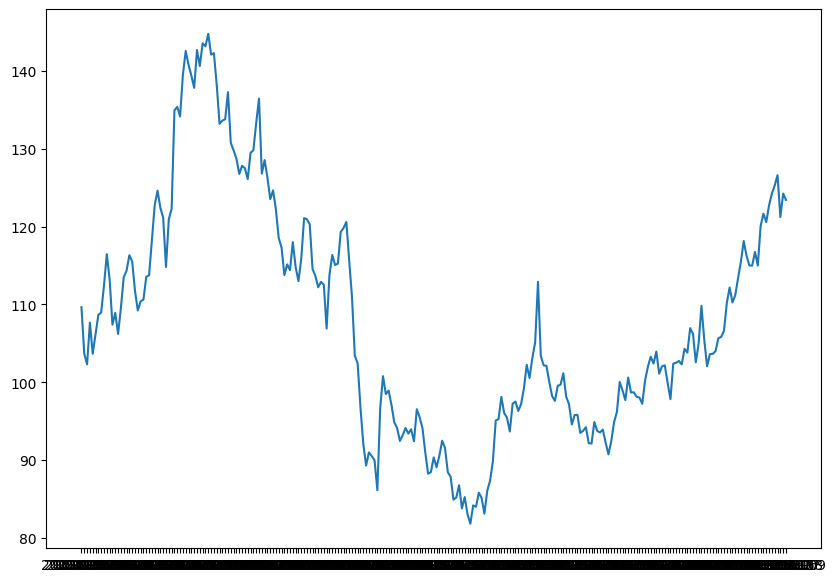

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(srt['Date'],srt['Close'])

In [ ]:
Close_srt=srt['Close']
Close_srt

0      109.650002
1      103.669998
2      102.309998
3      107.669998
4      103.660004
          ...    
246    125.300003
247    126.610001
248    121.230003
249    124.250000
250    123.430000
Name: Close, Length: 251, dtype: float64

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
Close_srt = scaler.fit_transform(np.array(Close_srt).reshape(-1,1))
Close_srt

array([[0.44202672],
       [0.34704572],
       [0.3254447 ],
       [0.41057812],
       [0.34688698],
       [0.38754767],
       [0.42662008],
       [0.43090847],
       [0.48634057],
       [0.55019059],
       [0.49872938],
       [0.40628975],
       [0.430432  ],
       [0.38738881],
       [0.44059718],
       [0.50317663],
       [0.51635963],
       [0.54812583],
       [0.53557817],
       [0.4753812 ],
       [0.43519697],
       [0.45393905],
       [0.45759208],
       [0.50397083],
       [0.50730627],
       [0.57798602],
       [0.65041292],
       [0.67995549],
       [0.64485385],
       [0.6245235 ],
       [0.52398346],
       [0.62182341],
       [0.64263024],
       [0.84386909],
       [0.85085769],
       [0.83132155],
       [0.91645497],
       [0.96489847],
       [0.93678532],
       [0.91470783],
       [0.8896125 ],
       [0.96680437],
       [0.93424396],
       [0.98046385],
       [0.97458694],
       [1.        ],
       [0.9574334 ],
       [0.960

In [ ]:
data=df.filter(['Close'])
dataset=data.values


In [ ]:
train_size = int(len(Close_srt)*0.7)
test_size = len(Close_srt) - train_size
train_data,test_data = Close_srt[0:train_size,:],Close_srt[train_size:len(Close_srt),:1]

In [ ]:
train_data.shape

(175, 1)

In [ ]:
test_data.shape

(76, 1)

In [ ]:
train_data=Close_srt[0:train_size,:]
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-50:i,0])
    y_train.append(train_data[i,0])
    if i <=60:
        print(x_train)
        print(y_train)
        print()


[array([0.49872938, 0.40628975, 0.430432  , 0.38738881, 0.44059718,
       0.50317663, 0.51635963, 0.54812583, 0.53557817, 0.4753812 ,
       0.43519697, 0.45393905, 0.45759208, 0.50397083, 0.50730627,
       0.57798602, 0.65041292, 0.67995549, 0.64485385, 0.6245235 ,
       0.52398346, 0.62182341, 0.64263024, 0.84386909, 0.85085769,
       0.83132155, 0.91645497, 0.96489847, 0.93678532, 0.91470783,
       0.8896125 , 0.96680437, 0.93424396, 0.98046385, 0.97458694,
       1.        , 0.9574334 , 0.96060997, 0.89596564, 0.81639139,
       0.82274453, 0.82560362, 0.88087675, 0.77716011, 0.76191223,
       0.74507619, 0.71394533, 0.73062263, 0.7256989 , 0.70346254])]
[0.7569885126586489]



In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, newshape = (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(115, 50, 1)

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0,2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(x_train, y_train, epochs=1,batch_size=1, verbose=1)

115/115 [==============================] - 5s 19ms/step - loss: 0.0319


In [ ]:
print(y_train.shape)



(115,)


In [ ]:
np.ndindex(np.random.rand(60,60).shape)


In [ ]:
test_data = Close_srt[train_size-50: , :]
x_test=[]
y_test=dataset[train_size:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-50:i,0])

In [ ]:
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions=model.predict(x_test)

3/3 [==============================] - 2s 16ms/step


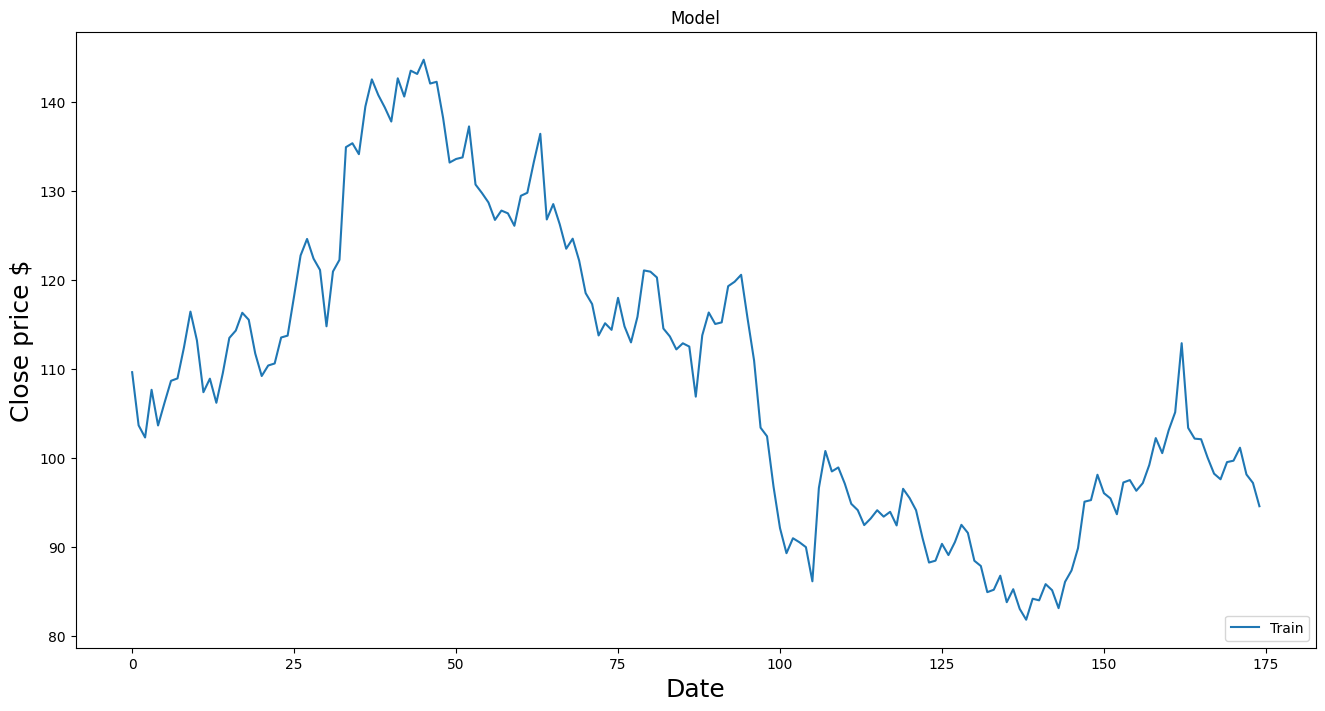

In [ ]:

train=data[:train_size]
valid=data[train_size:]

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price $',fontsize=18)
plt.plot(train['Close'])

plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()